# Série 11 - Exercices - Questions

Dans cette série d'exercice, on reprend les exemples traités lors de la série précédente, mais on complète le travail en estimant l'incertitude sur les paramètres du modèle.


**Exercice 1** - Incertitude sur l'âge du système solaire

On vous demande de reprendre les calculs fait dans la série 10, en estimant en plus l'incertitude sur l'âge.

Pour rappel :
- Le fichier `eucrites.txt` contient en première colonne contient le rapport isotopique 87Rb/86Sr et en deuxième colonne le rapport 87Sr/86Sr.
- On note $a$ la pente de la droite de régression
- La constante de désintégration du Rubidium 87 vaut $\lambda = 1.393 \times 10^{-11} an^{-1}$
- L'âge  s'obtient avec $t =\frac{ \log( a + 1)}{\lambda} $.

**Remarque** : Attention, le calcul de l'âge se fait avec une transformée non linéaire (un logarithme) de la pente. A partir de l'analyse de la régression, vous allez trouver la pente moyenne et sa variance. Pour trouver l'intervalle de confiance sur l'âge, vous pouvez utiliser la méthode de Monte-Carlo: simuler des valeurs de pente dans la loi gaussienne de moyenne et de variance obtenue par la régression, puis calculer l'âge et en déduire l'intervalle de confiance.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

**Exercice 2** - Graphe avec intervalle de confiance

Faire le graphe correspondant aux données d'Eucrites en représentant l'intervalle de confiance sur la droite estimée.

**Exercice 3** - Régression non linéaire

Nous reprenons maintenant l'exemple de la population de bactérie. Le code ci-dessous refait les étapes de la semaine dernière. Il calcule par la méthode des moindres carrés dans le cas non linéaire, le vecteur de paramètre optimal $p$, mais renvoie également la covariance des paramètres $C_p$

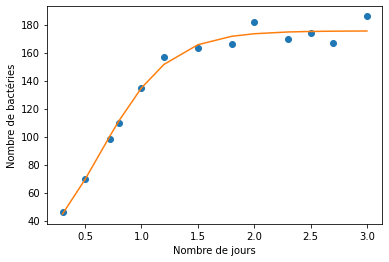

In [4]:
from scipy import optimize

# La fonction logistique
def logistique(t, n0, nmax, r):
    c = (nmax - n0) / n0
    return nmax / (1 + c * np.exp(-r * t))

# Les données
t = np.array((0.3,0.5,0.72,0.8,1,1.2,1.5,1.8,2,2.3,2.5,2.7,3)) # Temps en jours
n = np.array((46,70,98,110,135,157,163,166,182,170,174,167,186)) # Nombres de bactéries

# Optimisation non linéaire pour identifier les paramètres du modèle
p, Cp = optimize.curve_fit(logistique, t, n, p0=[10, 180, 2])

# Représentation du résultat
yc = logistique(t, *p)
plt.plot(t,n,'o')
plt.plot(t,yc,'-')
plt.ylabel('Nombre de bactéries')
plt.xlabel('Nombre de jours')
plt.show()

Que valent les intervalles de confiance sur chacun des paramètres ? **Etendre le code ci-dessous pour afficher ces intervalles de confiance**.

In [8]:
name_param = ["pop. initiale", "pop. maximale", "taux de croissance"]
print("Paramètres identifiés:")
for i in range(len(p)):
    print(f" {name_param[i]:20s} : {p[i]:6.2f},")

Paramètres identifiés:
 pop. initiale        :  20.10,
 pop. maximale        : 175.54,
 taux de croissance   :   3.24,


**Exercice 4** - Graphe avec intervalle de confiance

Utiliser un ensemble de simulations des paramètres pour calculer et représenter l'intervalle de confiance sur le nombre de bactérie en fonction du temps.